[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Classification with Scikit-learn </h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>



# Classification with Scikit-learn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Scikit-learn Interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available (not all for each model):

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, `fit` takes only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.
  
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
  + `model.predict()` : for clustering algorithms, the predict method will produce cluster labels for new data points. Not all clustering methods have this functionality.
  + `model.predict_proba()` : Gaussian mixture models (GMMs) provide the probability for each point to be generated by a given mixture component.
  + `model.score()` : Density models like KDE and GMMs provide the likelihood of the data under the model.

### Intro to Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.


First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

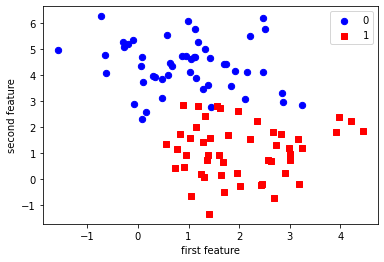

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [4]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

### The scikit-learn estimator API
<img src="https://raw.githubusercontent.com/rpi-techfundamentals/website_fall_2022/master/site/fig/supervised_workflow.svg" width="100%">


Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

In [5]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object.

In [6]:
classifier = LogisticRegression()

In [7]:
X_train.shape

(75, 2)

In [8]:
y_train.shape

(75,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression()

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [10]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [11]:
print(prediction)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [12]:
np.mean(prediction == y_test)

0.84

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [13]:
classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [14]:
classifier.score(X_train, y_train)

0.9733333333333334

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [15]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.87015709 -2.23877721]]
[4.64737766]
